# Ballpark analysis
This notebook showcases how we created the visualizations for the ballparks and filtered the data into a submetric for the overall ranking.

## Why This Submetric?
We chose ballparks because they are a great way to get outside in a community. People can get organized exercise, and a lot of ballparks in an area can greatly increase quality of life. Additionally, there are enough points in this dataset (and the datapoints are distributed in a non-uniform pattern) making it easy to use as a discriminator between the different neighborhoods (a metric with a very uniform distrubition is essentially useless, since it can't answer the ultimate question of *what is the best neighborhood*. 

## Methodology
First, we need to import some packages that will help us read and map the data provided by WPRDC.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

This next section just defines some constants for the eventual graph.

In [2]:
FG        = '#ffffff'
BG        = '#000000'
BLACK     = '#000000'
DARK_BLUE = '#141B4D'
DARK_GOLD = '#B58500'
PITT_GOLD = '#FFB81C'
GREEN     = '#22ff22'
PAD       = 5
WPAD      = 5
HPAD      = 5

After we created our constants and imported our packages, we can read in the neighborhood and ballfield shapefiles.

In [3]:
neighbors = gpd.read_file('Neighborhoods_Files/Neighborhoods_.shp')
fields =  gpd.read_file('Ballfields/Ballfields_PGH.shp')
nb = pd.read_csv('Neighborhoods_Files/pgh_neighborhoods.csv')
nb = nb[['name']]

Now we can create our first visualization. Geopandas uses latitude, longitude, and some other variables to determine how to plot everything in the shapefile. Since the ballparks are all within the City of Pittsburgh (due to the scope of the WPRDC dataset), we do not need to do any geographic filtering. All the following code is just creating the visualization and making sure it is formatted nicely.

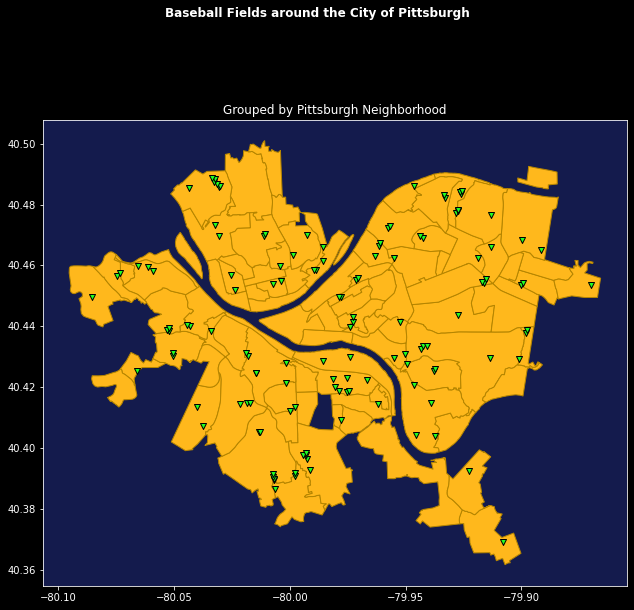

In [4]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_facecolor(DARK_BLUE)
neighbors.plot(ax=ax, color=PITT_GOLD, edgecolor=DARK_GOLD)
fields.plot(ax=ax, edgecolor=BLACK, marker='v', color=GREEN)
fig.patch.set_facecolor(BG)
ax.yaxis.set_tick_params(color=FG, labelcolor=FG)
ax.xaxis.set_tick_params(color=FG, labelcolor=FG)
plt.suptitle("Baseball Fields around the City of Pittsburgh", color=FG, weight='bold')
plt.title("Grouped by Pittsburgh Neighborhood", color=FG)
plt.tight_layout(pad=PAD, w_pad=WPAD, h_pad=HPAD)
for spine in ax.spines.values():
    spine.set_color(FG)
plt.show()

From this visualization, we can clearly see that there are some neighborhoods with many ballparks and some with none. This further shows that the dataset can be used as a discriminating metric.

To get the number of fields, we can use the contains() function from gpd. We add this as a new attribute (consts) to a dataframe with the corresponding neighborhood names

In [5]:
points = gpd.sjoin(fields, neighbors, how="inner", op='intersects')

# Add a field with 1 as a constant value
points['const']=1

# Group according to the column by which you want to aggregate data
nb = points.groupby(['hood'], as_index=False, dropna=False).sum()
nb = nb[['hood', 'const']]
nb = nb.sort_values('const', ascending=False) # we sort by highest first

And now we just need to plot it as a bar graph!

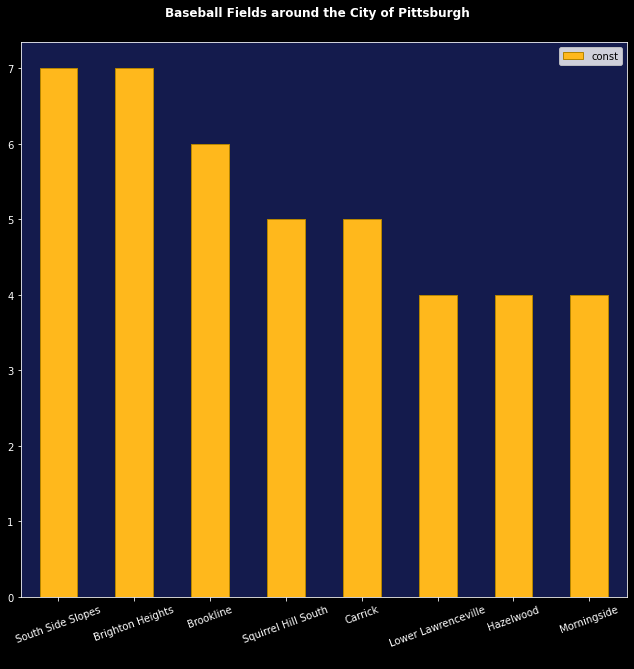

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_facecolor(DARK_BLUE)
nbplt = nb[:8]
nbplt.plot.bar(ax=ax, color=PITT_GOLD, edgecolor=DARK_GOLD, x='hood', rot=20)
fig.patch.set_facecolor(BG)
ax.yaxis.set_tick_params(color=FG, labelcolor=FG)
ax.xaxis.set_tick_params(color=FG, labelcolor=FG)
plt.suptitle("Baseball Fields around the City of Pittsburgh", color=FG, weight='bold')
plt.tight_layout(pad=PAD, w_pad=WPAD, h_pad=HPAD)
for spine in ax.spines.values():
    spine.set_color(FG)
plt.show()

## Converting to Submetric
Now that we have the count, we can normalize the values on a scale $x \in [0,1]$ where $0$ is the absolute minimum value and $1$ is the absolute maximum value. This helps us in the overall notebook since each feature/submetric will be set to the same scale, allowing us to set a weight to each metric and calculate a cumulative score.

In [7]:
max = nb['const'].iloc[0]
min = 0 # since 0 values were filtered out



# copy the data
df_min_max_scaled = nb.copy()
  
# apply normalization techniques by Column 1
column = 'const'
max = df_min_max_scaled[column].max()
min = 0
df_min_max_scaled[column] = (df_min_max_scaled[column] - min) / (max - min)    

Now that we have that submetric, we can easily create a function that returns the scaled dataframe. This will be accessed in the overall notebook to create the cumulative ranking!

In [8]:
def get_scaled_dataframe():
    return df_min_max_scaled

get_scaled_dataframe().head()

,hood,const
42,South Side Slopes,1.000000
7,Brighton Heights,1.000000
8,Brookline,0.857143
46,Squirrel Hill South,0.714286
9,Carrick,0.714286


### Et voila!
![thumbs](https://media.giphy.com/media/rMS1sUPhv95f2/giphy.gif)